<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Week_11/Cifar_100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from keras.datasets import cifar100

In [49]:
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

In [50]:
X_train.shape

(50000, 32, 32, 3)

In [51]:
X_test.shape

(10000, 32, 32, 3)

In [52]:
X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [53]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [54]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 40
classes = 100
loss = losses

In [56]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (32, 32, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [57]:
#bo ANN de phan loai
model.add(Flatten())    #chuyen anh thanh vecto, dua qua mang ANN
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 100

In [58]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [59]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/40
782/782 [==============================] - 6s 5ms/step - loss: 3.6188 - accuracy: 0.1555
Epoch 2/40
782/782 [==============================] - 4s 5ms/step - loss: 2.7540 - accuracy: 0.3112
Epoch 3/40
782/782 [==============================] - 6s 7ms/step - loss: 2.3360 - accuracy: 0.4009
Epoch 4/40
782/782 [==============================] - 4s 5ms/step - loss: 2.0403 - accuracy: 0.4626
Epoch 5/40
782/782 [==============================] - 4s 5ms/step - loss: 1.8036 - accuracy: 0.5152
Epoch 6/40
782/782 [==============================] - 5s 6ms/step - loss: 1.5941 - accuracy: 0.5653
Epoch 7/40
782/782 [==============================] - 4s 5ms/step - loss: 1.3848 - accuracy: 0.6152
Epoch 8/40
782/782 [==============================] - 4s 5ms/step - loss: 1.1993 - accuracy: 0.6614
Epoch 9/40
782/782 [==============================] - 5s 6ms/step - loss: 1.0288 - accuracy: 0.7034
Epoch 10/40
782/782 [==============================] - 4s 5ms/step - loss: 0.8701 - accuracy: 0.7445

In [61]:
model.save('/content/drive/MyDrive/AI/Backup_AI/cifar100_CNN.h5')

1/1 [==============================] - 0s 74ms/step


array([48])

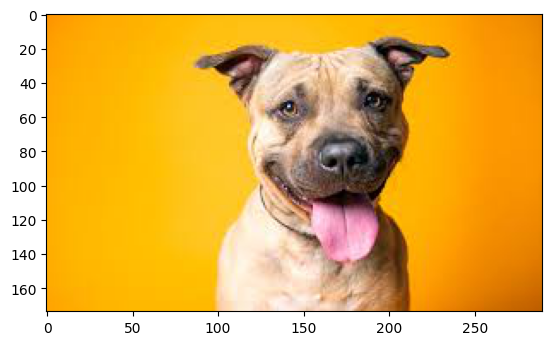

In [60]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

img1 = load_img('dog1.jpg')
plt.imshow(img1)

img = load_img('dog1.jpg', target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)